In [12]:
import time
import torch
p = (1 << 31) - 1
f = 1 << 10
def a_t_tensors_like(x: torch.Tensor, p: int, k: int, bias = False) -> tuple[torch.Tensor, torch.Tensor]:
    shape_a = x.shape[0], k
    
    shape_t = k, x.shape[1]
    if bias:
        shape_t = k, (x.shape[1]+1)
    a = torch.randint(low=0, high=p, size=shape_a, dtype=torch.long, device=x.device)
    t = torch.randint(low=0, high=p, size=shape_t, dtype=torch.long, device=x.device)
    return a, t

k_dict = {}
ks = [100]#, 200, 300, 400, 600]
for k in ks:
    k_dict[k] = []
    for i in range(8, 10):
        size = 1 << i
        w = torch.randn(size, size)
        w2 = torch.randn(size, size)
        
        x = torch.randn(size)
        x = torch.round(x * f).long() % p

        a, t = a_t_tensors_like(w, p, k)
        average_over = 50

        times = []
        for _ in range(average_over):
            start = time.time()
            m3 = torch.matmul(w, w2)
            #tx = torch.matmul(t, x.t())
            #atx = torch.matmul(a, tx).t() % p
            end = time.time()
            times.append(end - start)

        avg_time = sum(times) / average_over
        k_dict[k].append((size, avg_time))


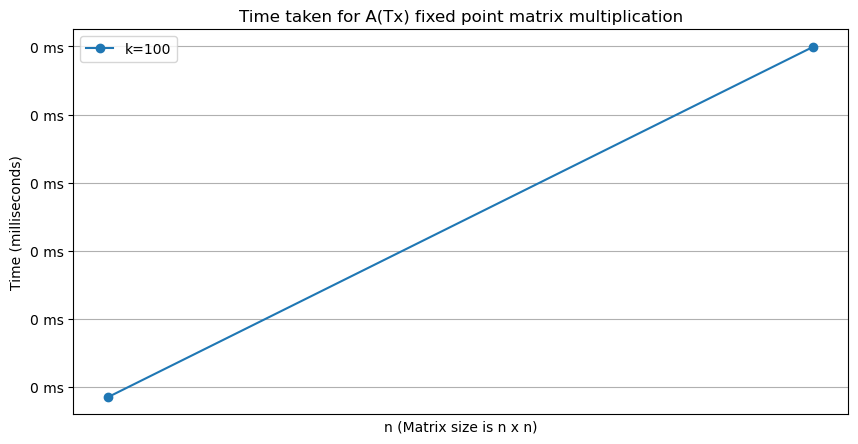

In [13]:

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for k, times in k_dict.items():
    sizes, durations = zip(*times)
    plt.plot(sizes, durations, label=f'k={k}', marker='o')
plt.xlabel('n (Matrix size is n x n)')
plt.ylabel('Time (milliseconds)')
plt.title('Time taken for A(Tx) fixed point matrix multiplication')
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4096))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x * 1000)} ms'))
plt.grid(True)
plt.show()
